In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=8d479d61b9080e8c050460a277a084b48dd03da808f7764376a7dad2cad3ab2e
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gzip
import shutil
import os
# import wget
import csv
import linecache
from shutil import copyfile
import numpy as np
import time
import pandas as pd
import re
from collections import OrderedDict
from nltk import word_tokenize, sent_tokenize, FreqDist
import matplotlib.pyplot as plt

###Downloading Script

In [ ]:
li = []
for i in range(1, 32):
  if(i<10):
    li.append("0"+str(i))
  else:
    li.append(str(i))

In [ ]:
#data downloading
# for date in li:
#   date = str(date)
#   dataset_URL = "https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-07-"+date+"/2020-07-"+date+"-dataset.tsv.gz?raw=true"
#   os.mkdir('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july')
#   wget.download(dataset_URL, out='/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv.gz')

#   with gzip.open('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv.gz', 'rb') as f_in:
#       with open('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv', 'wb') as f_out:
#           shutil.copyfileobj(f_in, f_out)

#   os.unlink('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv.gz')


#   #english language filtering and location filtering
#   filtered_language = 'en'
#   filtered_tw = list()
#   current_line = 1
#   with open('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv') as tsvfile:
#     tsvreader = csv.reader(tsvfile, delimiter="\t")

#     if current_line == 1:
#       filtered_tw.append(linecache.getline('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv', current_line))

#       for line in tsvreader:
#         if line[3] == filtered_language and line[4]!="NULL":
#           filtered_tw.append(linecache.getline('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv', current_line))
#         current_line += 1
#         # if current_line==20000:  break
#     with open('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv', 'w') as f_output:
#         for item in filtered_tw:
#             f_output.write(item)
  
#data downloading
for date in li:
  date = str(date)
  dataset_URL = "https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-07-"+date+"/2020-07-"+date+"-dataset.tsv.gz?raw=true"
  os.mkdir('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july')
  wget.download(dataset_URL, out='/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv.gz')

  with gzip.open('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv.gz', 'rb') as f_in:
      with open('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv', 'wb') as f_out:
          shutil.copyfileobj(f_in, f_out)

  os.unlink('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv.gz')


  #english language filtering and location filtering
  filtered_language = 'en'
  filtered_tw = list()
  current_line = 1
  with open('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv') as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter="\t")

    if current_line == 1:
      filtered_tw.append(linecache.getline('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv', current_line))

      for line in tsvreader:
        # print(line[2])
        # if line[3] == filtered_language and line[4]!="NULL":
        filtered_tw.append(linecache.getline('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv', current_line))
        current_line += 1
        if current_line==10000:  break
    with open('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+date+'july'+'/dataset.tsv', 'w') as f_output:
        for item in filtered_tw:
            f_output.write(item)

  


In [ ]:
# for i in li:
#   os.chdir('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+i+'july')
#   time.sleep(1)
#   !python /content/drive/MyDrive/Capstone/JulyAugSep2020/July/get_metadata.py -i dataset.tsv  -o dataset_hydrated.tsv  -k /content/drive/MyDrive/Capstone/misinformation/api_keys.json
for i in li:
  os.chdir('/content/drive/MyDrive/Capstone/JulyAugSep2020/July/'+i+'july')
  time.sleep(1)
  !python /content/drive/MyDrive/Capstone/JulyAugSep2020/July/get_metadata.py -i dataset.tsv  -o dataset_hydrated.tsv  -k /content/drive/MyDrive/Capstone/misinformation/api_keys.json
  print(i)


Your twitter api credentials are valid.
dataset_hydrated.tsv
dataset.tsv
tab seperated file, using \t delimiter
total ids: 9999
metadata collection complete
creating master json file
currently getting 0 - 100
currently getting 100 - 200
currently getting 200 - 300
currently getting 300 - 400
currently getting 400 - 500
currently getting 500 - 600
currently getting 600 - 700
currently getting 700 - 800
currently getting 800 - 900
currently getting 900 - 1000
currently getting 1000 - 1100
currently getting 1100 - 1200
currently getting 1200 - 1300
currently getting 1300 - 1400
currently getting 1400 - 1500
currently getting 1500 - 1600
currently getting 1600 - 1700
currently getting 1700 - 1800
currently getting 1800 - 1900
currently getting 1900 - 2000
currently getting 2000 - 2100
currently getting 2100 - 2200
currently getting 2200 - 2300
currently getting 2300 - 2400
currently getting 2400 - 2500
currently getting 2500 - 2600
currently getting 2600 - 2700
currently getting 2700 - 280

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Capstone/JulyAugSep2020/July/july2020.csv")

In [ ]:
data.head()

,id_str,favorite_count,language,text,is_retweet,created_at,retweet_count,media,country_code,country,lattitude,longitude,user_id,user_name,user_description,user_verification,user_followers
0,1267244461375074304,0,en,b'RT @SangyeH: \xe2\x80\x9cThe concept that\xe...,True,Sun May 31 23:59:58 +0000 2020,247,NaN,NaN,NaN,NaN,NaN,1106970334589304832,@phoenix,NaN,False,424
1,1267244469121765378,0,es,b'Empresas deben adaptar espacios de trabajo p...,False,Mon Jun 01 00:00:00 +0000 2020,0,NaN,NaN,NaN,NaN,NaN,2513348742,El Sol de Tlaxcala,El Sol de Tlaxcala es el periódico líder en el...,False,20627
2,1267244466441785351,0,es,b'RT @susiheidi: Esta demente??? Algun m\xc3\...,True,Sun May 31 23:59:59 +0000 2020,781,NaN,NaN,NaN,NaN,NaN,187883232,Ariadne 💖🐈🎨🌹📸,Algunos están destinados a razonar erróneament...,False,5838
3,1267244462515736576,0,en,b'RT @stevesilberman: As the unemployment numb...,True,Sun May 31 23:59:58 +0000 2020,61,NaN,NaN,NaN,NaN,NaN,47052792,Embrace your inner trash panda,"I'm me. Just another random, loudmouthed, opin...",False,1178
4,1267244467595153410,0,es,b'RT @lgbtpr: La comunidad trans de Puerto Ric...,True,Sun May 31 23:59:59 +0000 2020,31,NaN,NaN,NaN,NaN,NaN,877189904681246720,La Comay,Muy pronto los detalles. Usen en hashtag #laco...,False,852


In [ ]:
data.count()

id_str               221115
favorite_count       221115
language             221115
text                 221115
is_retweet           221115
created_at           221115
retweet_count        221115
media                  8905
country_code           1949
country                1949
lattitude               145
longitude               145
user_id              221115
user_name            221084
user_description     181934
user_verification    221115
user_followers       221115
dtype: int64

In [ ]:
data['country_code'].isnull().sum()

219166

In [ ]:
print("No. of instances: ",data.shape[0])
print("No. of null values: ", data['country_code'].isnull().sum())
data.shape[0]- data['country_code'].isnull().sum()

No. of instances:  221115
No. of null values:  219166


1949

###File merging code:

In [ ]:
# file1 = open('/content/drive/MyDrive/Capstone/misinformation/data.csv','a')
# file2 = open('/content/drive/MyDrive/Capstone/misinformation/mydata.csv','r')

In [ ]:
# count=1
# for line in file2:
#   if count>1:
#     file1.write(line)
#     count+=1
#   else:
#     count+=1

###Final_Data Analysis

In [ ]:
Coviddata =  pd.read_csv('/content/drive/MyDrive/Capstone/FinalDataCovid.csv')

In [ ]:
copyCovidData = Coviddata.copy()

In [ ]:
copyCovidData['month_only'] = copyCovidData['created_at'].str[4:7]

In [ ]:
copyCovidData.head()

,id_str,favorite_count,text,is_retweet,created_at,retweet_count,media,country_code,country,lattitude,longitude,user_id,user_name,user_description,user_verification,user_followers,month_only
0,1344874731011452928,0,b'@HoodieBoomstick @coronavirus Joined 2009 du...,False,Fri Jan 01 05:14:57 +0000 2021,0,NaN,US,United States,NaN,NaN,1013701613108658176,perron |-/,"thank mr dunn, I stan Oskar Sundqvist. \nPerro...",False,233,Jan
1,1344872582479290371,14,b'Let\xe2\x80\x99s be real. There\xe2\x80\x99s...,False,Fri Jan 01 05:06:24 +0000 2021,4,NaN,US,United States,NaN,NaN,190766916,John Sherbeck MD😷,#AABB21 Twitter Champion | Pathologist 🔬 Trans...,False,3129,Jan
2,1344876362855710728,0,b'Replying @BBCBreaking @CNBCnow @FT @AFP @der...,False,Fri Jan 01 05:21:26 +0000 2021,0,NaN,US,United States,NaN,NaN,254695508,nevadaenrolledagent,Enrolled Agent (IRS Tax Help). enrolledagent.g...,False,96,Jan
3,1344877225443790849,3,b'don\xe2\x80\x99t complain about covid-19 if ...,False,Fri Jan 01 05:24:51 +0000 2021,0,NaN,US,United States,NaN,NaN,3332349373,zoe,black lives do in fact fucking matter 💗,False,570,Jan
4,1344871464340774917,0,b'Coronavirus is over now. Right?',False,Fri Jan 01 05:01:58 +0000 2021,0,NaN,US,United States,NaN,NaN,2434470627,zane🌊,ani-manga and sports | HxH | TG | Jigo | UNC B...,False,678,Jan


In [ ]:
Coviddata.shape

(968717, 16)

In [ ]:
Coviddata['media'].value_counts().sum()

41529

In [ ]:
Coviddata['longitude'].value_counts().sum()

26202

In [ ]:
countries = Coviddata['country'].value_counts()

pd.set_option('display.max_rows', None)
countries

United States                                   397612
United Kingdom                                  123363
India                                           112997
Canada                                           74597
Australia                                        34669
South Africa                                     27668
Ireland                                          16342
Malaysia                                         13712
Republic of the Philippines                      11241
Pakistan                                         10159
Nigeria                                           9555
Kenya                                             7684
New Zealand                                       6833
Uganda                                            5856
Ghana                                             5336
Germany                                           4293
Thailand                                          4064
The Netherlands                                   3539
France    

##Analaysing US Data

In [ ]:
US_Covid_Data = Coviddata[Coviddata['country']=='United States']

In [ ]:
US_Covid_Data['country_code'].value_counts()

US    397598
PR        14
Name: country_code, dtype: int64

###Hashtag count and display

In [ ]:
US_text = US_Covid_Data['text']

In [ ]:
US_Covid_Data['hashtag'] = US_Covid_Data['text'].apply(lambda x: re.findall(r"#(\w+)", x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# US_Covid_Data.loc[US_Covid_Data['hashtag'] != str([])]

In [ ]:
US_Covid_Data.columns.values

array(['id_str', 'favorite_count', 'text', 'is_retweet', 'created_at',
       'retweet_count', 'media', 'country_code', 'country', 'lattitude',
       'longitude', 'user_id', 'user_name', 'user_description',
       'user_verification', 'user_followers', 'hashtag'], dtype=object)

In [ ]:
us_hashtag = US_Covid_Data['hashtag']
hashtag = " "
for i in us_hashtag:
  if(len(i)==1):
    hashtag += " "
    hashtag += " ".join(i)
    hashtag += " "
  else:
    hashtag += " ".join(i)

In [ ]:
hashtag = hashtag.lower()
hashtag

' covid19 louwestend 2021beginshappynewyear 2021makeawish bye2020 fireworks andersoncooper hello2021 cnnnye  covid19  covid19  covid19  wuhanvirus  trump  coronavirus  cnnnye  trumpvirus  happynewyear2021  covid19  syria  covid19 stamfordvt selectboard covid19grief loss trauma deathpositive 2021  covid19 trump covid19birding covid19 birdshappynewyear2021 bye2020 goodbye2020 happynewyear happynewyear2021 kind decent peaceful houston texasgirlnewyear newyearnewmecovid19 covidb117 florida covid19  covid19  covid19  covid19 faces funny face me cute lol girl beauty lmaocovid19 prayershappynewyear2021 2020 covid19 covid19 covid19 newyears journoliving andrewcoumo poloncarz taxeslost roadhouse lostwages covid19 americandream noscience bully celebrity ego covid19 newyearresolution covid 2021resolution covid19sandiego nye2020 california covid coronaviruskstate emaw covid19 sooners covid19  covid19 happynewyear coronavirusgrandpa covid19 survivor foe thisismylife covidvaccines  covid19  covid19 

In [ ]:
hashtag = hashtag.split()
fdist = FreqDist(hashtag)

In [ ]:
dict1 = OrderedDict(sorted(fdist.items(), key=lambda item:item[1], reverse=True))

In [ ]:
USHashValues = list(dict1.values())
USHashKeys = list(dict1.keys())

In [ ]:
USHashKeys[:20]

['covid19',
 'coronavirus',
 'covid',
 'vaccine',
 'covidvaccine',
 'getvaccinated',
 'covid19covid19',
 'wearamask',
 'hungry',
 'vaccinated',
 'deltavariant',
 'pandemic',
 'covid_19',
 'newsbreak',
 'breaking',
 'homeless',
 'nevada',
 'vaccines',
 'maskup',
 '1']

In [ ]:
def horizontal_bargraph(y1, x1):
  # y1 = list(dict1.keys())
  # x1 = list(dict1.values())

  f = plt.figure()
  f.set_figwidth(8)
  f.set_figheight(8)
  plt.barh(y1[-1:1:-1], x1[-1:1:-1])

  plt.ylabel("word frequency")
  # plt.invert_yaxis()
  plt.xlabel("count")
  plt.title("Horizontal bar graph")
  plt.show()

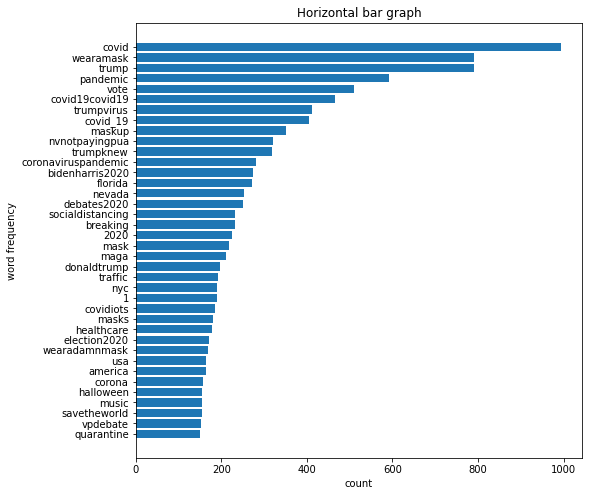

In [ ]:
horizontal_bargraph(USHashKeys[:40], USHashValues[:40])

###Month_wise Data of US

In [ ]:
US_Covid_Data['created_at'][:5]

0    Fri Jan 01 05:14:57 +0000 2021
1    Fri Jan 01 05:06:24 +0000 2021
2    Fri Jan 01 05:21:26 +0000 2021
3    Fri Jan 01 05:24:51 +0000 2021
4    Fri Jan 01 05:01:58 +0000 2021
Name: created_at, dtype: object

In [ ]:
no_of_row = US_Covid_Data.shape
no_of_row

(397612, 17)

In [ ]:
copy_US_Covid_Data = US_Covid_Data.copy()

In [ ]:
copy_US_Covid_Data['month_only'] = US_Covid_Data['created_at'].str[4:7]

In [ ]:
copy_US_Covid_Data.tail(500)

In [ ]:
def month_conversion(dataset):
  month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
  data = {}
  for month in month_list:
    data[month] = dataset[(dataset.month_only == month)]
  return data
  # code for hashing count of each country using data

In [ ]:
US = month_conversion(copy_US_Covid_Data)

###HashTag Count function

In [ ]:
def countHashTag(dataset):
  dataset['hashtag'] = dataset['text'].apply(lambda x: re.findall(r"#(\w+)", x))
  us_hashtag = dataset['hashtag']
  hashtag = " "
  for i in us_hashtag:
    if(len(i)==1):
      hashtag += " "
      hashtag += " ".join(i)
      hashtag += " "
    else:
      hashtag += " ".join(i)
  
  hashtag = hashtag.lower()
  hashtag = hashtag.split()
  fdist = FreqDist(hashtag)
  dict1 = OrderedDict(sorted(fdist.items(), key=lambda item:item[1], reverse=True))
  return dict1

In [ ]:
#higher values
# UScovid = []
# USpandemic = []
# USwearamask = []
USvote = []
# UStrumpvirus = []
UStrump = []
UShungry = []
USnewsbreak = []
USbreaking = []
UShomeless = []
USvaccines = []
USmoneyforthepeople = []
USbreakingnews = []
USbiden = []
#lower values
# USmaskup = []
# USquarantine = []

month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for month in month_list:
  dict1 = countHashTag(US[month])
  # UScovid.append(dict1['covid'])
  # USpandemic.append(dict1['pandemic'])
  # UStrumpvirus.append(dict1['trumpvirus'])
  UStrump.append(dict1['trump'])
  # UShungry.append(dict1['hungry'])
  USbreaking.append(dict1['breaking'])
  # USnewsbreak.append(dict1['newsbreak'])
  # UShomeless.append(dict1['homeless'])
  USvaccines.append(dict1['vaccines'])
  USmoneyforthepeople.append(dict1['moneyforthepeople'])
  USbreakingnews.append(dict1['breakingnews'])
  USbiden.append(dict1['biden'])
  # USwearamask.append(dict1['wearamask'])
  # USvote.append(dict1['vote'])
  # USmaskup.append(dict1['maskup'])
  # USquarantine.append(dict1['quarantine'])

In [ ]:
dataToPlot = {'Months':month_list, 'Trump':UStrump, 'USbreaking':USbreaking, 'USvaccines':USvaccines, 'USmoneyforthepeople': USmoneyforthepeople, 'USbreakingnews':USbreakingnews, 'USbiden':USbiden}

In [ ]:
def monthwise_linegraph(monthwise_data):
  months = [ 'Jan' , 'Feb' , 'March', 'April' , 'May' , 'June' , 'July' , 'Aug', 'Semp', 'Oct', 'Nov', 'Dec' ]
  monthdataset = pd.DataFrame(monthwise_data)
  fig, ax = plt.subplots(figsize=[9, 7])
  ax = plt.gca()
  
  columns  = list(monthdataset.columns)
  
  for i in range(1, len(columns)):
    monthdataset.plot(x=monthdataset['Months'].name, y=monthdataset[columns[i]].name, ax = ax)
  
  ax.set_xlabel('Frequency count')
  ax.set_ylabel('Months')

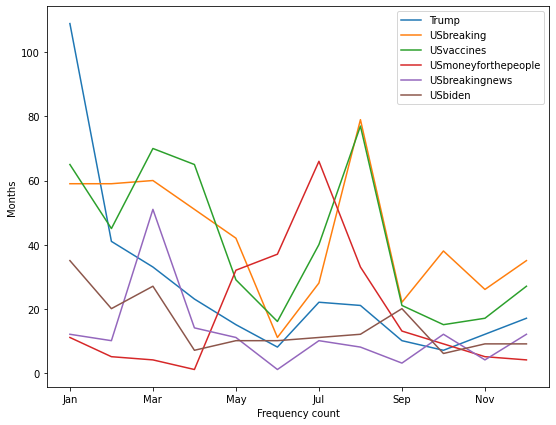

In [ ]:
monthwise_linegraph(dataToPlot)

##India Covid Analysis

In [ ]:
India_Covid_Data = copyCovidData[copyCovidData['country']=='India']

In [ ]:
India = month_conversion(India_Covid_Data)

In [ ]:
listing = []
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for month in month_list:
  try:
    dict_ind = countHashTag(India[month])
    listing.append(dict_ind['oxygen'])
  except:
    listing.append(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# In_vacination = []
# In_vaccine = []
# In_nifty = []
# In_oxygen = []
# In_breaking = []
# In_lockdown = []
# In_narendramodi = []
# In_help = []
# In_bjp = []
# In_mumbai = []
# In_covid19indiahelp = []
# lists = ["In_vacination", "In_vaccine", "In_nifty", "In_oxygen", "In_breaking", "In_lockdown", "In_narendramodi", "In_help", "In_bjp", "In_mumbai", "In_covid19indiahelp"]

# lists = ', '.join(test_list)
# for li_name in lists:
#   li_name = []
hashName = ['vaccination', 'vaccine', 'nifty', 'breaking', 'oxygen']

listings = []
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(len(hashName)):
  listings.append([]) 
  for month in month_list:
    try:
      dict1 = countHashTag(India[month])
      listings[i].append(dict1[hashName[i]])
    except:
      listings[i].append(0)
    # In_vacination.append(dict1['vaccination'])
    # In_vaccine.append(dict1['vaccine'])
    # In_nifty.append(dict1['nifty'])
    # # In_oxygen.append(dict1['oxygen'])
    # In_breaking.append(dict1['breaking'])
    # In_covid19indiahelp.append(dict1['covid19indiahelp'])
    # In_mumbai.append(dict1['mumbai'])
    # In_help.append(dict1['help'])
    # In_bjp.append(dict1['bjp'])
    # In_lockdown2021.append(dict1['lockdown'])
    # In_narendramodi.append(dict1['narendramodi'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


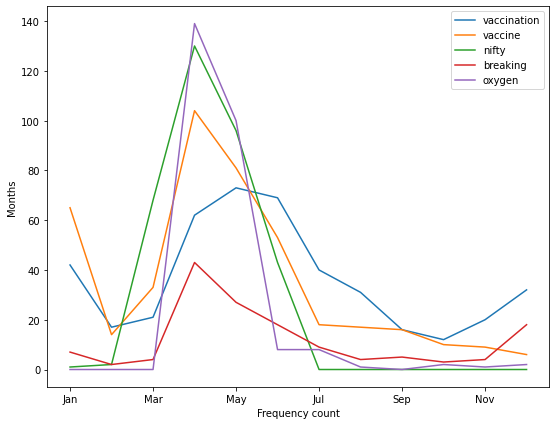

In [ ]:
dataToPlot_India = {'Months':month_list, 'vaccination':listings[0], 'vaccine':listings[1], 'nifty':listings[2], 'breaking':listings[3], 'oxygen':listings[4] }
monthwise_linegraph(dataToPlot_India)

In [ ]:
countHashTag(India_Covid_Data)

OrderedDict([('covid19', 15290),
             ('covid19indiahelp', 2401),
             ('coronavirus', 2054),
             ('covid', 989),
             ('india', 882),
             ('covid19india', 606),
             ('covid19covid19', 582),
             ('indiafightscorona', 546),
             ('corona', 477),
             ('sipgrab', 436),
             ('vaccination', 434),
             ('vaccine', 426),
             ('covid_19', 414),
             ('lockdown', 397),
             ('mumbai', 387),
             ('nifty', 340),
             ('coronaviruspandemic', 316),
             ('delhi', 312),
             ('covaxin', 296),
             ('covidindia', 296),
             ('maharashtra', 283),
             ('covidvaccine', 276),
             ('covidsecondwave', 268),
             ('oxygen', 261),
             ('largestvaccinedrive', 251),
             ('vaccinated', 249),
             ('pandemic', 231),
             ('staysafe', 227),
             ('omicron', 227),
             ('cov

###Analyze UK data

In [ ]:
UK_Covid_Data = Coviddata[Coviddata['country']=='United Kingdom']
UK = month_conversion(UK_Covid_Data)

In [ ]:
countHashTag(UK_Covid_Data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


OrderedDict([('covid19', 13327),
             ('coronavirus', 1517),
             ('nhs', 547),
             ('vaccine', 538),
             ('covid', 537),
             ('lockdown', 525),
             ('dateofalqadrnightramadan1442', 436),
             ('covid19covid19', 386),
             ('vaccination', 335),
             ('covid19uk', 329),
             ('covidvaccine', 310),
             ('uk', 251),
             ('covid_19', 192),
             ('pandemic', 191),
             ('omicron', 189),
             ('london', 171),
             ('morningcommute', 157),
             ('covidvaccination', 151),
             ('astrazeneca', 141),
             ('brexit', 139),
             ('borisjohnson', 138),
             ('vaccines', 130),
             ('johnson', 128),
             ('wearamask', 123),
             ('staysafe', 122),
             ('vaccinated', 120),
             ('getvaccinated', 111),
             ('wales', 108),
             ('covidiots', 107),
             ('lockdown3', 